In [1]:
import sidechainnet as scn

In [2]:
data_base_dirs = {
    "test":
    {
        "before":{
            "direc":"/ihome/dkoes/jok120/openfold/out/experiments/230320/validate_val_after_training/16_390/wandb/run-20230322_115143-3659ab3t",
            "csv":""
            },
        "after":{
            "direc":"/ihome/dkoes/jok120/openfold/out/experiments/230320/validate_val_after_training/16_390/wandb/run-20230322_114810-18trq0ov",
            "csv":""
            }
},
    "val":
    {
        "before":{
            "direc":"/ihome/dkoes/jok120/openfold/out/experiments/230320/validate_val_initial_training_b/wandb/run-20230320_211151-36cdbdde",
            "csv":""
            },
        # "after-complete": {
        #     "direc":"/ihome/dkoes/jok120/openfold/out/experiments/230320/validate_val_after_training/40_942_1w4vxghv/wandb/run-20230321_231336-yi0kwfq5",
        #     "csv":""
        #     },
        "after": {
            "direc":"/ihome/dkoes/jok120/openfold/out/experiments/230320/validate_val_after_training/16_390/wandb/run-20230322_114130-2asi49hx",
            "csv":""
            }
    }
}

In [3]:
for split in ["val", "test"]:
    for version, dirpath_csv in data_base_dirs[split].items():
        dirpath = dirpath_csv["direc"]
        print(split, version, dirpath)
        !mkdir -p ~/acs2023/evaluation_data/{split}/{version}
        !scp  h2p:{dirpath}/files/val.csv ~/acs2023/evaluation_data/{split}/{version}/
        !scp -r  h2p:{dirpath}/files/pdbs ~/acs2023/evaluation_data/{split}/{version}/
        data_base_dirs[split][version]["local-csv"] = f"~/acs2023/evaluation_data/{split}/{version}/val.csv"
        data_base_dirs[split][version]["local-pred-pdbs"] = f"~/acs2023/evaluation_data/{split}/{version}/pdbs"

val before /ihome/dkoes/jok120/openfold/out/experiments/230320/validate_val_initial_training_b/wandb/run-20230320_211151-36cdbdde
val.csv                                       100%   78KB  21.5MB/s   00:00    
pred_0168_7lqm_D.pdb                          100%  182KB  12.8MB/s   00:00    
pred_0144_7bny_B.pdb                          100%  101KB  21.2MB/s   00:00    
pred_0015_7ool_A.pdb                          100%   68KB  21.1MB/s   00:00    
pred_0040_7fh3_A.pdb                          100%  253KB  47.3MB/s   00:00    
pred_0013_7mrq_A.pdb                          100%  188KB  30.8MB/s   00:00    
pred_0173_7kpj_E.pdb                          100%  171KB  46.9MB/s   00:00    
pred_0061_7b1k_B.pdb                          100%  139KB  36.2MB/s   00:00    
pred_0032_7rdt_A.pdb                          100%  157KB  47.3MB/s   00:00    
pred_0110_7dms_A.pdb                          100%   61KB  30.1MB/s   00:00    
pred_0130_7nl4_A.pdb                          100%  135KB  54.8MB/s   

# Measure the OpenMM energy of the PDBs

In [5]:
data_base_dirs

{'test': {'before': {'direc': '/ihome/dkoes/jok120/openfold/out/experiments/230320/validate_val_after_training/16_390/wandb/run-20230322_115143-3659ab3t',
   'csv': '',
   'local-csv': '~/acs2023/evaluation_data/test/before/val.csv',
   'local-pred-pdbs': '~/acs2023/evaluation_data/test/before/pdbs'},
  'after': {'direc': '/ihome/dkoes/jok120/openfold/out/experiments/230320/validate_val_after_training/16_390/wandb/run-20230322_114810-18trq0ov',
   'csv': '',
   'local-csv': '~/acs2023/evaluation_data/test/after/val.csv',
   'local-pred-pdbs': '~/acs2023/evaluation_data/test/after/pdbs'}},
 'val': {'before': {'direc': '/ihome/dkoes/jok120/openfold/out/experiments/230320/validate_val_initial_training_b/wandb/run-20230320_211151-36cdbdde',
   'csv': '',
   'local-csv': '~/acs2023/evaluation_data/val/before/val.csv',
   'local-pred-pdbs': '~/acs2023/evaluation_data/val/before/pdbs'},
  'after': {'direc': '/ihome/dkoes/jok120/openfold/out/experiments/230320/validate_val_after_training/16_39

In [4]:
import glob
import os
#import tqdm for notebooks
from tqdm.notebook import tqdm

In [7]:
# create csv file to record energies based on pdb files
csv_file = open("230322_energy_v2.csv", "w")
csv_file.write("pdb,spit,version,energy_myh,energy\n")
for split in tqdm(["val", "test"]):
    for version, dirpath_csv in tqdm(data_base_dirs[split].items()):
        pdb_files = glob.glob(os.path.expanduser(f"{dirpath_csv['local-pred-pdbs']}/pred/*.pdb"))
        data_base_dirs[split][version]["pdb-energies"] = []
        data_base_dirs[split][version]["pdb-energies-myh"] = []
        for pdb in tqdm(pdb_files):
            # Compute energy with my hydrogen adding method
            p = scn.SCNProtein.from_pdb(pdb)
            p.add_hydrogens(add_to_heavy_atoms=True)
            e = p.get_energy(return_unitless_kjmol=True)
            data_base_dirs[split][version]["pdb-energies-myh"].append(e)
            # Compute energy with openmm hydrogen adding method
            p2 = scn.SCNProtein.from_pdb(pdb)
            e2 = p2.get_energy(add_missing=True, add_hydrogens_via_openmm=True, return_unitless_kjmol=True)
            data_base_dirs[split][version]["pdb-energies"].append(e2)
            #write the pdb basename, omit the pred_0000_ prefix
            csv_file.write(f"{os.path.basename(pdb)[10:-4]},{split},{version},{e},{e2}\n")
            # flush
            csv_file.flush()

csv_file.close()
                           


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/184 [00:00<?, ?it/s]

  0%|          | 0/184 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/78 [00:00<?, ?it/s]

  0%|          | 0/78 [00:00<?, ?it/s]

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_style("darkgrid")

In [24]:
val_before = pd.read_csv(data_base_dirs["val"]["before"]["local-csv"])
val_after = pd.read_csv(data_base_dirs["val"]["after-complete"]["local-csv"])
val_before.head()

,protein_name,distogram,experimentally_resolved,fape,plddt_loss,masked_msa,supervised_chi,violation,openmm_scaled,openmm,...,rmsd_ca,gdtts_ca,gdtha_ca,rmsd_aa,gdcall_aa,tmscore_aa,tmscore_ca,drmsd_aa,lddt_aa,lddtquasi_aa
0,7au7_A,1.006745,0.693147,0.432176,1.962513,0.361442,0.324099,0.314364,0.000100,1.000000,...,0.838434,0.950739,0.816502,1.536673,0.779447,0.987356,0.977510,1.205491,0.855667,0.856091
1,7f8a_A,0.679438,0.693147,0.384490,1.571567,0.590973,0.195727,0.132499,0.000100,1.000000,...,1.199704,0.900000,0.725510,1.471000,0.745541,0.989085,0.966189,0.948522,0.912355,0.912630
2,7vmu_A,0.952823,0.693147,0.440878,1.981733,0.375211,0.353823,0.284124,0.000100,1.000000,...,0.899820,0.936364,0.768182,1.376992,0.751888,0.989275,0.975896,1.018882,0.857419,0.857836
3,6wmk_A,1.980916,0.693147,0.456639,2.595275,0.000025,0.422177,0.211192,0.000100,1.000000,...,1.066982,0.915385,0.742308,2.682809,0.657157,0.934662,0.897713,1.986710,0.720829,0.721898
4,7mpz_A,0.950167,0.693147,0.309782,1.400970,0.773024,0.196442,0.048816,0.000081,0.806038,...,1.258024,0.902174,0.730072,1.668609,0.707855,0.980229,0.940816,1.385770,0.903370,0.903698


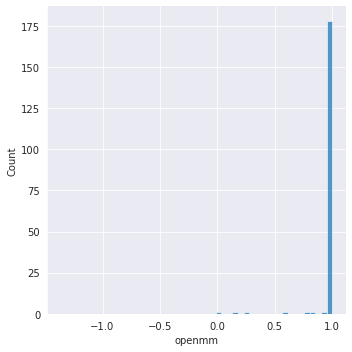

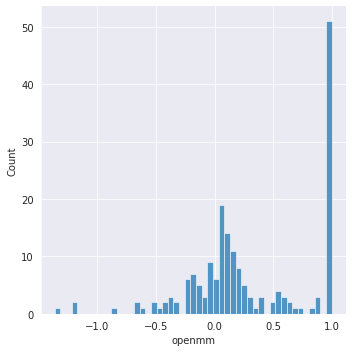

In [50]:
min_val = min(val_before["openmm"].min(), val_after["openmm"].min())
max_val = max(val_before["openmm"].max(), val_after["openmm"].max())
bins = np.linspace(min_val, max_val, 50)
sns.displot(val_before.openmm, kde=False, label="before", bins=bins)
sns.displot(val_after.openmm, kde=False, label="after", bins=bins)

AttributeError: 'numpy.ndarray' object has no attribute 'xaxis'

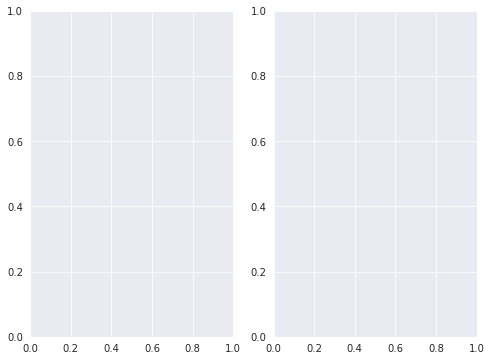

In [92]:
# A single histogram of openmm energies from val_{before,after}['openmm']
# Path: jk_research/230322_acs_plots_energy_comparison.ipynb
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

# Specify the bins to be the same between the two histograms
import numpy as np
min_val = min(val_before["openmm"].min(), val_after["openmm"].min())
max_val = max(val_before["openmm"].max(), val_after["openmm"].max())
bins = np.linspace(min_val, max_val, 50)

fig, ax = plt.subplots(1, 2, figsize=(8, 6))
sns.histplot(val_before["openmm"], ax=ax, label="before", bins=bins)
sns.histplot(val_after["openmm"], ax=ax, label="after", bins=bins, color="orange")
ax.set_xlabel("OpenMM energy (kcal/mol)")
ax.set_ylabel("Frequency")
ax.legend()
plt.show()


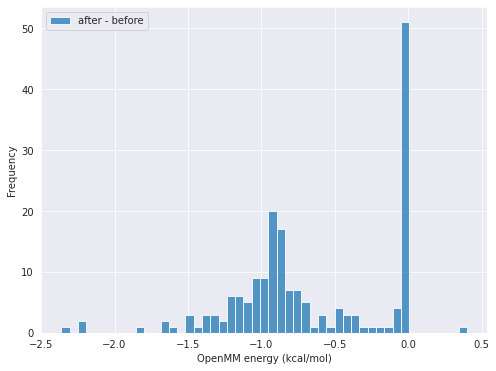

In [43]:
# Now make the same figure but plot a single distribution representing the difference between the two
# Path: jk_research/230322_acs_plots_energy_comparison.ipynb
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

# Specify the bins to be the same between the two histograms
import numpy as np
diff = val_after["openmm"] - val_before["openmm"]
min_val = diff.min()
max_val = diff.max()
bins = np.linspace(min_val, max_val, 50)

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.histplot(diff, ax=ax, label="after - before", bins=bins)
ax.set_xlabel("OpenMM energy (kcal/mol)")
ax.set_ylabel("Frequency")
ax.legend()
plt.show()